In [34]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

import re

import seaborn as sns

from sklearn import datasets
from sklearn.datasets import load_iris, fetch_lfw_people
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

data = datasets.fetch_california_housing(data_home=None, download_if_missing=True, return_X_y=False)
dataset_houses = pd.DataFrame(columns=data["feature_names"], data=data["data"])
dataset_houses.loc[:,'Price'] = data["target"]

dataset = pd.read_csv("src/titanic.csv")
dataset2 = pd.read_csv("src/Data.csv")

iris = load_iris()
faces = fetch_lfw_people(min_faces_per_person=60)

In [17]:
px.histogram(dataset["Age"])

In [5]:
# Univariate analysis
# Distribution of each numeric variable
num_features = ['Age', 'Salary']
for f in num_features:
    fig = px.histogram(dataset2, f, color = 'Purchased', facet_row = 'Purchased', histnorm = 'probability')
    fig.show()

In [39]:
px.scatter(dataset_houses, x = 'MedInc', y = 'Price')

In [15]:
px.scatter(dataset, x = 'SibSp', y = 'Parch', color = dataset['Pclass'].astype('str'), labels = {'color': 'Classe'})

In [2]:
fig = px.histogram(x = dataset['Age'], nbins = 120, title = "Distribution of target variable")
fig.show()

In [40]:
# Visualize average Price vs. HouseAge
mean_price_per_houseage = dataset_houses.groupby('HouseAge')['Price'].mean().reset_index()
mean_price_per_houseage.head()

px.line(mean_price_per_houseage, x = 'HouseAge', y = 'Price')

In [19]:
dataset.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


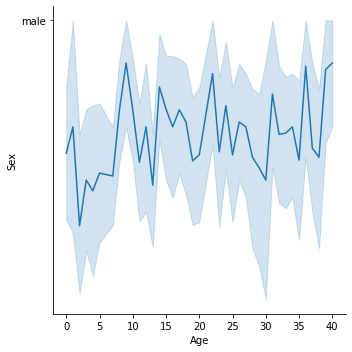

In [22]:
var_cut = pd.qcut(dataset["Age"], 50, labels=False, duplicates="drop")
sns.relplot(x=var_cut, y=dataset["Sex"], kind="line")


In [13]:
# Distribution of each numeric variable
num_features = ['Age']
fig1 = make_subplots(rows = len(num_features), cols = 1, subplot_titles = num_features)
for i in range(len(num_features)):
    fig1.add_trace(
        go.Histogram(
            x = dataset[num_features[i]], nbinsx = 4),
        row = i + 1,
        col = 1)
fig1.update_layout(
        title = go.layout.Title(text = "Distribution of quantitative variables", x = 0.5), showlegend = False, 
            autosize=False, height=500)
fig1.show()

In [15]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
# Barplot of each qualitative variable
cat_features = ['Pclass', 'Sex']
fig2 = make_subplots(rows = len(cat_features), cols = 1, subplot_titles = cat_features)
for i in range(len(cat_features)):
    
    x_coords = dataset[cat_features[i]].value_counts().index.tolist()
    y_coords = dataset[cat_features[i]].value_counts().tolist()
    
    fig2.add_trace(
        go.Bar(
            x = x_coords,
            y = y_coords),
        row = i + 1,
        col = 1)
fig2.update_layout(
        title = go.layout.Title(text = "Barplot of qualitative variables", x = 0.5), showlegend = False, 
            autosize=False, height=500)
fig2.show()

In [26]:
dataset_short = dataset[:][0:3]

# Visualize pairwise dependencies
fig = px.scatter_matrix(dataset_short)
fig.update_layout(
        title = go.layout.Title(text = "Bivariate analysis", x = 0.5), showlegend = False, 
            autosize=False, height=800, width = 800)
fig.show()

In [ ]:
# Visualize the model
# Visualize predictions on training Set
fig = px.scatter(x = X_train.flatten().tolist(), y = Y_train, title = "training set")
fig.add_trace(go.Scatter(x = X_train.flatten().tolist(), y = Y_train_pred, name = "linear regression"))
fig.show()

# Visualize predictions on test Set
fig = px.scatter(x = X_test.flatten().tolist(), y = Y_test, title = "test set")
fig.add_trace(go.Scatter(x = X_test.flatten().tolist(), y = Y_test_pred, name = "linear regression"))
fig.show()

In [ ]:
X = iris.data
y = iris.target

X_2d = X[:, :2] # keep first two features
X_2d = X_2d[y > 0] # remove class 0 observations from X
y_2d = y[y > 0] # remove class 0 observations from y
y_2d -= 1 # set values of y from {1,2} to {0,1}

Xtrain, Xtest, ytrain, ytest = train_test_split(X_2d, y_2d, test_size = 0.3)
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

C_range = [1e-2, 1, 1e2]
gamma_range = [1e-1, 1, 1e1]
print(C_range)
print(gamma_range)

classifiers = []
for C in C_range:
    for gamma in gamma_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(Xtrain, ytrain)
        classifiers.append((C, gamma, clf))

xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
sample_grid = np.c_[xx.ravel(), yy.ravel()]

_,_,classif = classifiers[6]
Z = classif.decision_function(sample_grid)
plt.pcolormesh(xx,yy,-Z.reshape(xx.shape),cmap=plt.cm.RdBu)

plt.pcolormesh(xx,yy,-Z.reshape(xx.shape),cmap=plt.cm.RdBu)
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=ytrain, cmap=plt.cm.RdBu_r,
                edgecolors='k')

### Debut

In [ ]:
### Suite

plt.figure(figsize=(8, 6))
for (k, (C, gamma, clf)) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(sample_grid)
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_range), len(gamma_range), k + 1)
    plt.title("gamma=10^{0}, C=10^{1}".format(np.log10(gamma), np.log10(C)),
              size='medium')

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=ytrain, cmap=plt.cm.RdBu_r,
                edgecolors='k')
    plt.contour(xx,yy,Z.reshape(xx.shape), levels = [0.0], colors ="black")
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')

## Plot têtes

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC

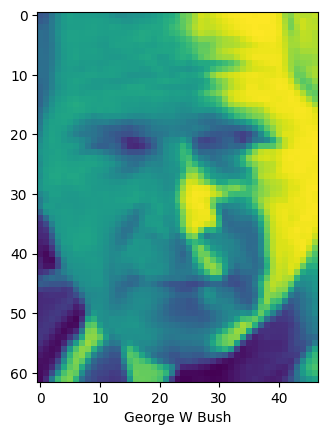

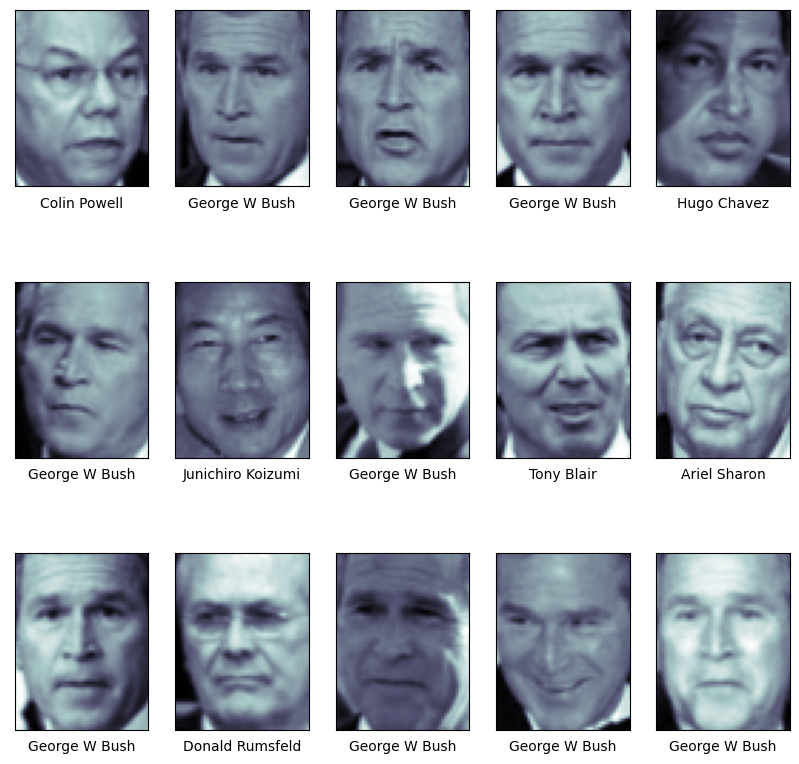

In [25]:
print(faces.DESCR)

plt.imshow(faces.images[7])
plt.xlabel(faces.target_names[faces.target[7]]);

fig, ax = plt.subplots(3, 5, figsize=(10,10))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],xlabel=faces.target_names[faces.target[i]])

In [ ]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[Y_pred[i]].split()[-1],
                   color='black' if Y_pred[i] == Y_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Title', ylabel='count'>

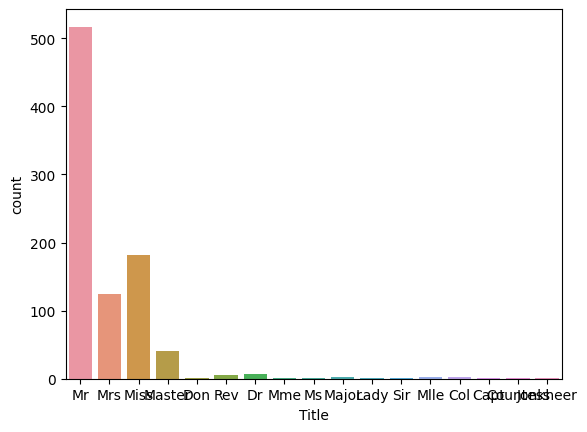

In [33]:
# prend les sufixes 'Bidules.'
dataset["Title"] = dataset["Name"].apply(lambda x: re.search(' ([A-Za-z]+)\.', x).group(1))
# visu
sns.countplot(dataset.Title)

In [ ]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns = [a.split(" (")[0].replace(" ","_") for a in iris.feature_names])
target = pd.DataFrame(iris.target, columns=["species"])

X_train, X_test, y_train, y_test = train_test_split(data, target)
X_train.head()

fig, ax = plt.subplots(3,1)

sns.set_style("white")
sns.kdeplot(data.sepal_width, data.sepal_length, ax = ax[0])
ax[0].title.set_text('Full dataset distribution')

sns.kdeplot(X_train.sepal_width, X_train.sepal_length, ax = ax[1])
ax[1].title.set_text('Train set distribution')

sns.kdeplot(X_test.sepal_width, X_test.sepal_length, ax = ax[2])
ax[2].title.set_text('Test set distribution')